# Metody obliczeniowe w nauce i technice#

## Vadim Karpinskiy

### Laboratorium 7: Single Value Decomposition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.image import imread
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 100

#### Zadanie 1: Przekształcenie sfery w elipsoidę

Przy robieniu tego zadania korzystałem z następujących źródeł:
- Deep Learning Book Series · 2.8 Singular Value Decomposition, Hadrien Jean Ph.D
- Matrix Analysis and Applied Linear Algebra, Carl D. Mayer, SIAM, 2000, rozd. 5.12
- http://faculty.washington.edu/sbrunton/me565/pdf/CHAPTER1.pdf

1. Korzystając z równania parametrycznego narysuj sferę jednostkową w 3D

In [2]:
def sphere(n):
    s = np.linspace(0, 2*np.pi, n)
    t = np.linspace(0, np.pi, n)

    ss, tt = np.meshgrid(s,t)

    x = np.cos(ss) * np.sin(tt)
    y = np.sin(ss) * np.sin(tt)  
    z = np.cos(tt)
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    
    ax.plot_surface(x, y, z, alpha=0.5, cmap = cm.jet, antialiased = False)

    return x, y, z

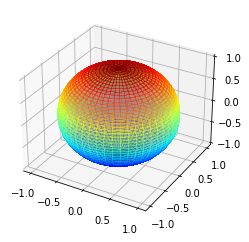

In [3]:
x,y,z = sphere(50)

2. Wygeneruj 3 różne macierze A1,A2,A3, ($A_{i} ∈ R_{3×3}$), za ich pomocą dokonaj przekształcenia sfery w elipsoidę (mnożenie przez macierz), a następnie przedstaw wizualizację uzyskanego wyniku w 3D.

In [4]:
A1 = np.random.rand(3,3)
A2 = np.random.rand(3,3)
A3 = np.random.rand(3,3)

In [16]:
def matrix_multiply(A,B):
    result = [0,0,0]
    for i in range(len(A)):
        for j in range(len(B)):
            result[i] += A[i][j] * B[j]
    return result

def sphere_to_ellipsoid(x, y, z, A):
    
    xR = np.zeros_like(x)
    yR = np.zeros_like(y)
    zR = np.zeros_like(z)

    for i in range(len(x[0])):
        for j in range(len(x[0])):
            T = np.array([x[i,j], y[i,j], z[i,j]])
            result = matrix_multiply(A,T)
            xR[i,j] = result[0]
            yR[i,j] = result[1]
            zR[i,j] = result[2]
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')   
    ax.plot_surface(xR, yR, zR, alpha=0.5, cmap=cm.jet, antialiased=False)
    
    return [xR, yR, zR]

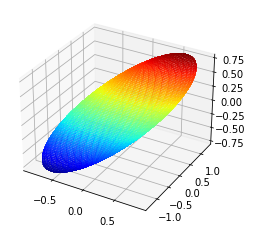

In [17]:
E1 = sphere_to_ellipsoid(x, y, z, A1)

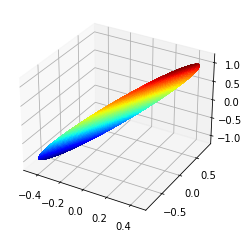

In [18]:
E2 = sphere_to_ellipsoid(x, y, z, A2)

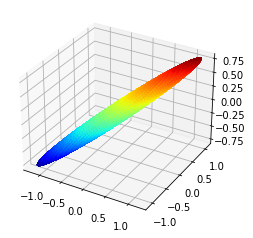

In [19]:
E3 = sphere_to_ellipsoid(x, y, z, A3)

3. Dokonaj rozkładu według wartości osobliwych (SVD) każdej macierzy Ai. Na wykresie elipsoidy odpowiadającej przekształceniu Ai dodaj wizualizację jej półosiwyznaczonych za pomocą SVD.

In [20]:
U1, D1, vT1 = np.linalg.svd(A1)
U2, D2, vT2 = np.linalg.svd(A2)
U3, D3, vT3 = np.linalg.svd(A3)

Macierz U mówi nam jak nasza sfera została obrócona, macierz diagonalna D - jak sfera została rozciągnięta.

**Nie udało mi się zrobić tego zadania**

4. Wygeneruj taką macierz $A_{i}$, aby stosunek jej największej i najmniejszej wartości osobliwej był większy od 100. Narysuj odpowiadającą jej elipsoidę.

Wiemy, że największa wartość osobliwa będzie u góry, a najmniejsza na dole macierzy diagonalnej D

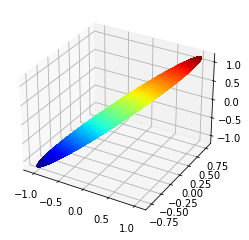

In [22]:
def generate_matrix():
    changer = np.random.rand(3,3)
    U,D,vT = np.linalg.svd(changer)
    while D[0]/D[-1] < 100:
        changer = np.random.rand(3,3)
        U,D,vT = np.linalg.svd(changer)
    return changer

stretcher = generate_matrix()
stretched_ellipsoid = sphere_to_ellipsoid(x, y, z, stretcher)

5. Dla wybranej macierzy $A_{i}$ przedstaw wizualizacje $SV_{i}^{T}$, $SΣ_{i}V_{i}^{T}$ oraz $SU_{i}Σ_{i}V_{i}^{T}$,gdzie $A_{i} = U_{i}Σ_{i}V_{i}^{T}$, a S oznacza sferę z punktu 1 ($S ∈ R^{n×3}$).

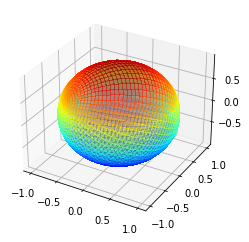

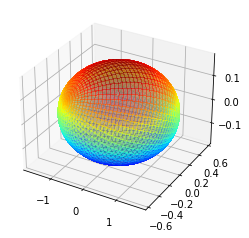

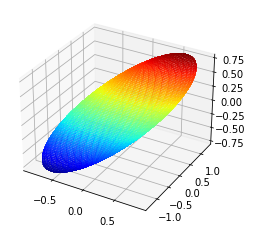

In [23]:
U,D,vT = np.linalg.svd(A1)

sphere_transformation1 = sphere_to_ellipsoid(x, y, z, vT)
sphere_transformation2 = sphere_to_ellipsoid(x, y, z, np.diag(D) @ vT)
sphere_transformation3 = sphere_to_ellipsoid(x, y, z, U @ np.diag(D) @ vT)

#### Zadanie 2: Kompresja obrazu

Przy robieniu tego zadania korzystałem z następujących źródeł:
- Image Compression with SVD, James Chen, ECS 289K Scientific Computation, Dec. 13, 2000
- Matrix Analysis and Applied Linear Algebra, Carl D. Mayer, SIAM, 2000, rozd. 5.12
- Data driven science & engineering: Machine Learning, Dynamical Systems and Control, Steven L.Brunton, J. Nathan Kutz

1. Przygotuj przykładowe zdjęcie z skali szarości o rozmiarze co najmniej 512x512 pikseli (np. Lenna image)

In [24]:
def image_prepare():
    A = imread('lena15.jpg')
    X = np.mean(A, -1)
    return X

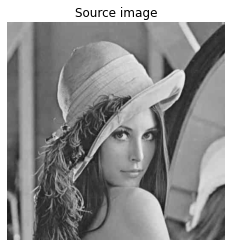

In [25]:
X = image_prepare()
img = plt.imshow(X)
img.set_cmap('gray')
plt.title("Source image")
plt.axis('off')
plt.show()

2. Oblicz SVD macierzy pikseli I, a następnie dokonaj przybliżenia tej macierzy za pomocą *low rank approximation* (*k* pierwszych wartości osobliwych) uzyskując kompresję obrazu wejściowego.

$$
I_{a} \simeq \sum_{i = 1}^{k}\sigma_{i}u_{i}v_{i}^{T},
$$
gdzie:

$\sigma_{i}$ - i-ta wartość osobliwa macierzy I,
$u_{i}$ - lewy wektor osobliwy,
$v_{i}$ - prawy wektor osobliwy,
a $u_{i}v_{i}^{T}$ - iloczyn zewnętrzny (*outer product*) dwóch wektorów


In [26]:
def svd_compression(r_values):
    U, D, vT = np.linalg.svd(X, full_matrices=False)
    D = np.diag(D)
    j = 0
    res = []
    for r in r_values:
        Xapprox = U[:, :r] @ D[0:r, :r] @ vT[:r, :]
        j += 1
        plt.figure(j)
        img = plt.imshow(Xapprox)
        img.set_cmap('gray')
        plt.title("Liczba wartości osobliwych: " + str(r))
        plt.axis('off')
        plt.show()
        res.append(Xapprox)
    return res

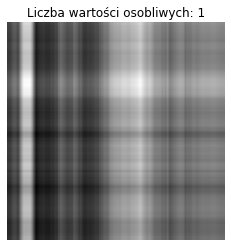

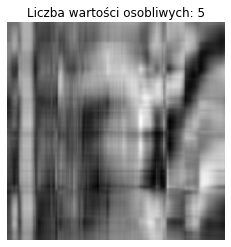

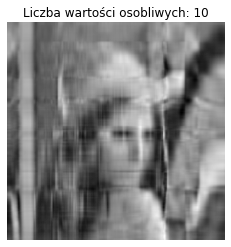

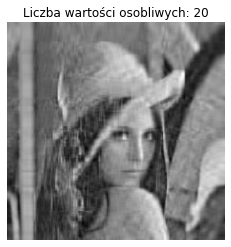

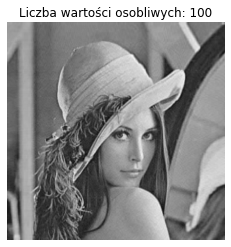

In [27]:
R = [1, 5, 10, 20, 100]
res = svd_compression(R)

3. Porównaj obraz wynikowy z obrazem źródłowym dla różnych wartości k (przedstawiając różnicę pomiędzy nimi w postaci zdjęcia oraz rysując wykres zależności $|| I−I_{a} ||$ od k).

Im bardziej podobne są obrazki, tym bardziej szary i niewyraźny musi być obraz wynikowy

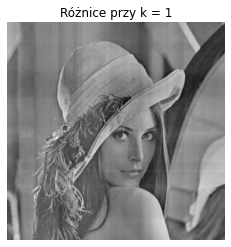

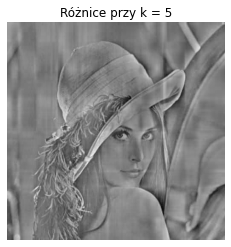

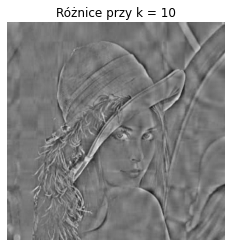

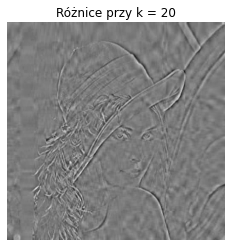

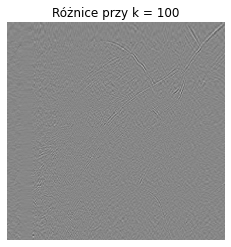

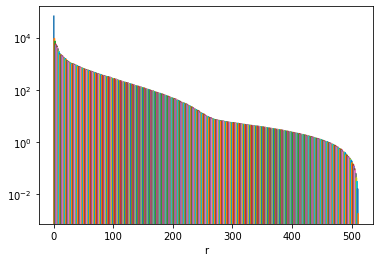

In [28]:
def comparison():
    j = 0
    matrixes = []
    dots = []
    for i in range(len(res)):
        T = np.subtract(X, res[i])
        j += 1
        plt.figure(j)
        img = plt.imshow(T)
        img.set_cmap('gray')
        plt.title("Różnice przy k = " + str(R[j-1]))
        plt.axis('off')
        plt.show()
        matrixes.append(T)

    _, D, _ = np.linalg.svd(X)
    plt.figure(1)
    plt.xlabel("r")
    plt.semilogy(np.diag(D))
    plt.show()
    
comparison()